# CUNEF MUCD 2022/2023

# Machine Learning
# Análisis de Fraude¶

### Autores:
- Gozde Yazganoglu
- Irma Sanchez


# Importación de Librerías


In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix


from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


from aux_func import evaluate_model, cargar_modelo

In [2]:
xtrain = pd.read_parquet("../data/processed/xtrain.parquet")
ytrain = pd.read_parquet("../data/processed/ytrain.parquet")
xtest = pd.read_parquet("../data/processed/xtest.parquet")
ytest = pd.read_parquet("../data/processed/ytest.parquet")

In [3]:
#Cargamos pipeline preprocesado
preprocessor = cargar_modelo('../models/preprocessor.pickle')

# Decision Tree Classifier

El árbol de decisión es una técnica de aprendizaje supervisado que se puede utilizar tanto para problemas de clasificación como de regresión, pero se prefiere sobre todo para resolver problemas de clasificación. Es un clasificador con estructura de árbol, donde los nodos internos representan las características de un conjunto de datos, las ramas representan las reglas de decisión y cada nodo  representa el resultado.

In [4]:
clf_dtc = Pipeline(steps=[
    ('preprocesador', preprocessor), 
    
    ('clasificador', DecisionTreeClassifier(criterion='gini', random_state=0))])

In [5]:
clf_dtc.fit(xtrain, ytrain)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['step', 'amount',
                                                   'connection_time',
                                                   'oldbalanceOrg', 'age',
                                                   'newbalanceOrig',
                                                   'user_number',
                                                   'user_connections',
                                                   'security_alert',
                                                   'oldbalanceDest',
      

In [6]:
with open('../models/model_DTC.pickle', 'wb') as f:
    pickle.dump(clf_dtc, f)

In [17]:
ypred = clf_dtc.predict(xtrain)
ypred_proba = clf_dtc.predict_proba(xtrain)


# Ajuste del umbral de predicción


In [18]:
# keep probabilities for the positive outcome only
yhat = ypred_proba[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(ytrain, yhat)

gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

ypred_new_threshold = (ypred_proba[:,1]>thresholds[ix]).astype(int)
evaluate_model(ytrain,ypred_new_threshold,ypred_proba)

Best Threshold=1.000000, G-Mean=1.000
ROC-AUC score of the model: 1.0
Accuracy of the model: 0.9989104260544072

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    837946
           1       0.00      0.00      0.00       914

    accuracy                           1.00    838860
   macro avg       0.50      0.50      0.50    838860
weighted avg       1.00      1.00      1.00    838860


Confusion matrix: 
[[837946      0]
 [   914      0]]



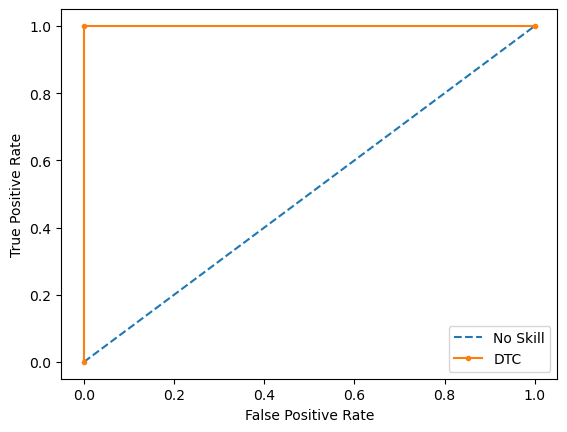

In [12]:
import matplotlib.pyplot as plt
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='DTC')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [13]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=1.000000, G-Mean=1.000
